<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module2/M2_1/c_GraphicalMethod_Redundant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphical Method: Redundant Constraints

**OPIM 5641: Business Decision Modeling - Department of Operations and Information Management - University of Connecticut**

------------------------------------------

(from Nagraj Chapter 2)  A redundant constraint  is a constraint that does not affect the feasible region in any way. In other words, other constraints in the model are more restrictive and thereby negate the need to even consider the redundant constraint. The presence of redundant constraints is quite common in large LP models with many variables. However, it is typically impossible to determine whether a constraint is redundant just by looking at it. 

Here is the original Flair Furniture example again.

$Max(Z) = 7T + 5C$

### Original Constraints
subject to:
* $3T + 4C <= 2400$ `(carpentry time)`
* $2T + 1C <= 1000$ `(painting time)`
* $C <= 450$ `(maximum chairs allowed)`
* $T >= 100$ `(minimum tables required)`
* $T,C >= 0$ `(nonnegativity)`

As you may recall, here is what that example looked like.

Text(110, 200, 'FEASIBLE REGION')

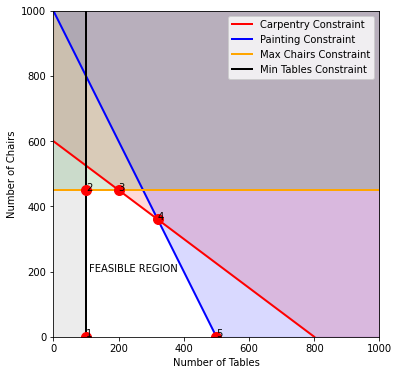

In [ ]:
# this is the example from Pyomo cookbook
# pylab makes it easy to make plots
from pylab import *

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) 
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Min Tables constraint
plot([100, 100],[0,1000],'black',lw=2)
fill_between([0,100],[0,0],[1000,1000],color='grey',alpha=0.15)

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# # Optimum
plot(100,0,'r.',ms=20) # makes a red dot on the plot
annotate('1', xy=(100,0), xytext=(100,0)) # adds a label

plot(100,450,'r.',ms=20) # makes a red dot on the plot
annotate('2', xy=(100,450), xytext=(100,450)) # adds a label

plot(200,450,'r.',ms=20) # makes a red dot on the plot
annotate('3', xy=(200,450), xytext=(200,450)) # adds a label

plot(320,360,'r.',ms=20) # makes a red dot on the plot
annotate('4', xy=(320,360), xytext=(320,360)) # adds a label

plot(500,0,'r.',ms=20) # makes a red dot on the plot
annotate('5', xy=(500,0), xytext=(500,0)) # adds a label

# the area in white is the feasible region!
text(110,200,'FEASIBLE REGION')

But now let's update this: assume that demand for tables is **quite weak**, so instead of needing at least 100 tables, we set a maximum of 100 tables.

### Updated Constraints
subject to:
* $3T + 4C <= 2400$ `(carpentry time)`
* $2T + 1C <= 1000$ `(painting time)`
* $C <= 450$ `(maximum chairs allowed)`
* $T <= 100$ `(maximum tables required - UPDATED!)`
* $T,C >= 0$ `(nonnegativity)`

Let's plot this and compare!

Text(40, 90, 'FEASIBLE REGION!')

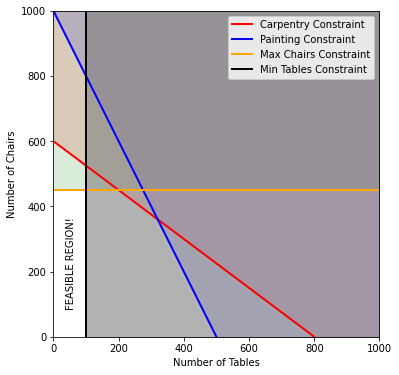

In [ ]:
# this is the example from Pyomo cookbook
# pylab makes it easy to make plots
from pylab import *

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) 
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Max Tables constraint (shade to the right!)
plot([100, 100],[0,1000],'black',lw=2)
fill_between([100,1000], #X curve
             [0,0], #Y1 curve
             [1000,1000], #Y2 curve
             color='grey',
             alpha=0.6) # values closer to 0 are transparent, closer to 1 is dark

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# add text for feasible region
# the area in white is the feasible region!
text(40,90,'FEASIBLE REGION!', rotation=90)

# What do we see?
Yes, the feasible region has changed... but that's not the main point! It's that your red and blue constraints aren't doing anything anymore since they don't interact with the feasible region!

From this figure, we see that the production limit constraints on chairs and tables are so restrictive that they make the carpentry (red line) and painting (blue line) constraints **redundant**. That is, these two time constraints have no effect on the feasible region.  

If a constraint does not intersect with the feasible region, it is redundant!

Note how our corner points have changed, too.